<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de Circuitos II

# TRABAJO PRACTICO LABORATORIO
#### Autor: RICARDO RELOZ


# #Ejercicio:

## Objetivos
### Consolidar los conceptos de teoría moderna mediante la implementación circuital.
### Simular e implementar el filtro con componentes activos de precisión.
### Medir las partes de la función transferencia para frecuencias de 0 a 100 kHz.

## Descripción

### El trabajo práctico consiste en el diseño, análisis, medición y discusión de un filtro activo. 
### Las instrucciones pormenorizadas de lo que deberán realizar las encontrarán en el Anexo.

## FILTRO: Chebyshev
### fcorte = 1.5KHz
### fstop = 4.5KHz
### AtMax = 0.5dB
### AtMin = 16dB

## Calculo de transferencia
<img src="./CALCULOS1.jpg" align="left" width="600" /> 
<img src="./CALCULOS2.jpg" align="left" width="600" /> 
<img src="./CALCULOS3.jpg" align="left" width="600" /> 

## Ejercicio 2
### Calculo de Y y MAI
<img src="./ejercicio2A.jpeg" align="left" width="600" /> 
<img src="./ejercicio2B.jpeg" align="left" width="600" /> 

### Calculo de VO/VI con MAI
<img src="./ejercicio2C.jpeg" align="left" width="600" /> 

### Calculo de Zet con MAI
<img src="./ejercicio2D.jpeg" align="left" width="600" /> 
<img src="./ejercicio2E.jpeg" align="left" width="600" /> 
<img src="./ejercicio2F.jpeg" align="left" width="600" /> 

### Simulacion en SPYDER EJERCICIO 1

Red Pi


<IPython.core.display.Math object>

Red equivalente


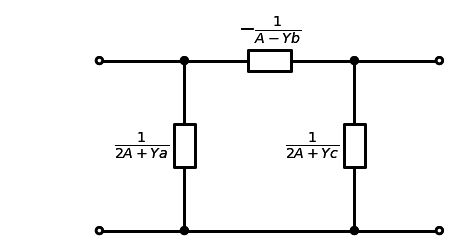

## Conversión Y - Z

Red Pi original


<IPython.core.display.Math object>

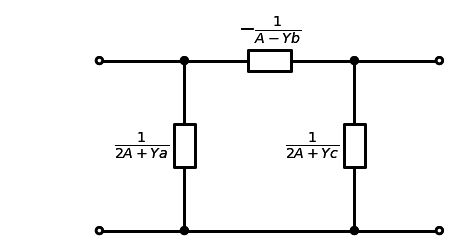

Conversión a Tee (T. Kennelly)


<IPython.core.display.Math object>

Red equivalente


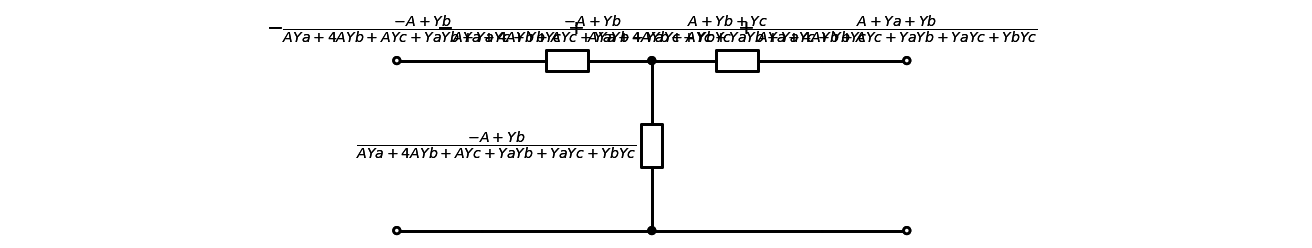

para mayor claridad, si se trabaja un poco más las expresiones de los componentes quedan

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Si se sabe que Delta Y(trans) la A = 1/0 tiende a infinito


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Ahora importamos las funciones de PyTC2
from pytc2.dibujar import dibujar_Pi, dibujar_Tee, dibujar_lattice
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
#from pytc2.dibujar import dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_espaciador, dibujar_espacio_derivacion, dibujar_puerto_entrada, dibujar_puerto_salida
#from schemdraw.elements import  Resistor, ResistorIEC, Capacitor, Inductor, Line, Dot, Gap, Arrow
import sympy as sp
from IPython.display import display,  Markdown
from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s
from sympy import oo
from sympy import symbols, Matrix
from sympy import init_printing


#Ya = Y // Yb = Y/2  //Yc = Y/3 
Ya, Yb, Yc = sp.symbols('Ya, Yb, Yc', complex=True)
#Y = sp.symbols('Y', complex=True)
A = sp.symbols('A', real=True, positive=True)


Ypi = sp.Matrix([[Ya+Yb + A, -Yb+A], [-Yb + A, Yc + Yb + A]])
#Ypi = sp.Matrix([[Y+Y/2 + A, -Y/2+A], [-Y/2 + A, Y/3 + Y/2 + A]])

print('Red Pi')
print_latex(a_equal_b_latex_s('Y_{\pi}', Ypi))

print('Red equivalente')
dibujar_Pi(Ypi)


display(Markdown('## Conversión Y - Z'))

print('Red Pi original')

print_latex(a_equal_b_latex_s('Y_{\pi}', Ypi))

dibujar_Pi(Ypi)

print('Conversión a Tee (T. Kennelly)')

Zpi = Ypi**-1
print_latex(a_equal_b_latex_s('Z_{\pi}', Zpi))

print('Red equivalente')

Zpi_a, Zpi_b, Zpi_c = dibujar_Tee(Zpi, return_components = True)

display(Markdown('para mayor claridad, si se trabaja un poco más las expresiones de los componentes quedan'))

print_latex(a_equal_b_latex_s('Z_{A\pi}', sp.simplify(sp.expand(Zpi_a)) ))

print_latex(a_equal_b_latex_s('Z_{B\pi}', sp.simplify(sp.expand(Zpi_b)) ))

print_latex(a_equal_b_latex_s('Z_{C\pi}', sp.simplify(sp.expand(Zpi_c)) ))

Zpi_sym = sp.simplify(Zpi.subs(Yb, 0.5))
Zpi_sym = sp.simplify(Zpi_sym.subs(Ya, 1))
Zpi_sym = sp.simplify(Zpi_sym.subs(Yc, 1/3))

print_latex(a_equal_b_latex_s('Z_{\pi}', Zpi_sym))



print('Si se sabe que Delta Y(trans) la A = 1/0 tiende a infinito')

print_latex(a_equal_b_latex_s('Z_{1red}', sp.limit(Zpi_sym [0], A, oo)))
print_latex(a_equal_b_latex_s('Z_{2red}', sp.limit(Zpi_sym [1], A, oo)))
print_latex(a_equal_b_latex_s('Z_{3red}', sp.limit(Zpi_sym [2], A, oo)))
print_latex(a_equal_b_latex_s('Z_{4red}', sp.limit(Zpi_sym [3], A, oo)))


### Simulacion en SPYDER EJERCICIO 1
Aca asumimos que la Y total, es la suma de Y(Resistencias) + Y(Transformador)

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import sympy as sp

from sympy import symbols, Matrix
from sympy import init_printing

from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn
from pytc2.general import print_latex

init_printing()  # Inicializa la impresión en Jupyter

# T puenteado cargado: red de R constante
# explicación:
'''    
+ Numeramos los polos de 0 a n=3

  
    0----Ya----+---Yc---|
               |        |
              Yb        G
               |        |
    1----------+---------
    
'''    

Ya, Yb, Yc = sp.symbols('Ya Yb Yc', complex=True)
G = sp.symbols('G', real=True, positive=True)

input_port = [1, 0]
output_port = [3, 0]

# Armo la MAI

#               Nodos: 0      1        2        3
Ymai = sp.Matrix([  
                    [ Yb+G,     0,      -Yb,        -G],
                    [ 0,        Ya,     -Ya,        0],
                    [ -Yb,      -Ya,    Ya+Yb+Yc,   -Yc],
                    [ -G,       0,      -Yc,        G+Yc]
                 ])

con_detalles = False
# con_detalles = True

print('Transferencia de tensión:')
Vmai = calc_MAI_vtransf_ij_mn(Ymai, output_port[0], output_port[1], input_port[0], input_port[1], verbose=con_detalles)

print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(output_port[0], output_port[1], input_port[0], input_port[1]) +  sp.latex(Vmai) )

Vmai_sym = sp.simplify(Vmai.subs(Yc, 3*Ya))

Vmai_sym = sp.simplify(Vmai_sym.subs(G, 1))

Vmai_sym = sp.simplify(Vmai_sym.subs(1/(Ya*Yb), 9/8))

print_latex( r'T^{{ {:d}{:d} }}_{{ {:d}{:d} }} = '.format(output_port[0], output_port[1], input_port[0], input_port[1]) +  sp.latex(Vmai_sym) )

Transferencia de tensión:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

## SIMULACION LTSPICE
### Circuito 1
<img src="./CIRCUITO1.jpeg" align="left" width="900" /> 

### Grafico de cuadripolo circuito 1
<img src="./GRAFICO1.jpeg" align="left" width="900" /> 

### Circuito 2
<img src="./CIRCUITO2.jpeg" align="left" width="900" /> 

### Grafico de cuadripolo circuito 2
<img src="./GRAFICO2.jpeg" align="left" width="900" /> 



## Conclusiones y Reflexiones
El análisis de circuitos mediante matrices de admitancia indefinida (MAI) y el uso de Python con el módulo SymPy ha demostrado ser una herramienta importante para el estudio de redes eléctricas complejas. La capacidad de calcular simbólicamente parámetros importantes como la impedancia de entrada o salida, junto con la simulación numérica en LTspice, nos ha permitido validar nuestros resultados teóricos con simulaciones realistas, especialmente al trabajar con transformadores reales y configuraciones de cuadripolos. A lo largo del proceso, se ha destacado la importancia de integrar herramientas computacionales para automatizar cálculos, mejorar la precisión y facilitar la interpretación clara de los resultados. Además, una reflexion sobre cómo los modelos ideales y reales difieren en su comportamiento, remarcando que las condiciones del mundo real son clave para un análisis preciso. En conjunto, al enfoque combinado permite abordar problemas complejos en circuitos eléctricos de manera eficiente y fundamentada.